In [7]:
import torch
import requests
from PIL import Image
from diffusers import DiffusionPipeline, EulerAncestralDiscreteScheduler

# from diffusers_support.pipline import Zero123PlusPipeline

# Load the pipeline
pipeline = DiffusionPipeline.from_pretrained(
# pipeline = Zero123PlusPipeline.from_pretrained(
    "sudo-ai/zero123plus-v1.2", custom_pipeline="sudo-ai/zero123plus-pipeline",
    torch_dtype=torch.float16
)

# Feel free to tune the scheduler!
# `timestep_spacing` parameter is not supported in older versions of `diffusers`
# so there may be performance degradations
# We recommend using `diffusers==0.20.2`
pipeline.scheduler = EulerAncestralDiscreteScheduler.from_config(
    pipeline.scheduler.config, timestep_spacing='trailing'
)
pipeline.to('cuda:0')

# Download an example image.
cond = Image.open(requests.get("https://d.skis.ltd/nrp/sample-data/lysol.png", stream=True).raw)

# Run the pipeline!
result = pipeline(cond, num_inference_steps=75, width=320*3, height=320*5).images[0] 
# for general real and synthetic images of general objects
# usually it is enough to have around 28 inference steps
# for images with delicate details like faces (real or anime)
# you may need 75-100 steps for the details to construct

result.show()
cond.save("input.png")
result.save("output_.png")

100%|██████████| 75/75 [00:30<00:00,  2.47it/s]


torch.Size([1, 4, 200, 120])
pil
torch.Size([1, 3, 1600, 960])


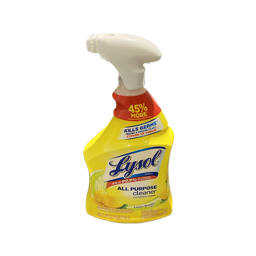

In [10]:
cond

In [8]:
import torch
import requests
from PIL import Image
from diffusers import DiffusionPipeline, EulerAncestralDiscreteScheduler
import numpy as np
import os

# Load the pipeline
pipeline = DiffusionPipeline.from_pretrained(
    "sudo-ai/zero123plus-v1.2", custom_pipeline="sudo-ai/zero123plus-pipeline",
    torch_dtype=torch.float16
)

# Feel free to tune the scheduler!
# `timestep_spacing` parameter is not supported in older versions of `diffusers`
# so there may be performance degradations
# We recommend using `diffusers==0.20.2`
pipeline.scheduler = EulerAncestralDiscreteScheduler.from_config(
    pipeline.scheduler.config, timestep_spacing='trailing'
)
pipeline.to('cuda:0')

path = '/home/yuxuan/project/Wonder3D/2k2k_data/front'
save_path = './result_2k2k_front'
for subj in os.listdir(path):
    subj_path = os.path.join(path, subj)

    cond = Image.open(subj_path)
    # The object should be located in the center and resized to 80% of image height.
    cond_human = Image.fromarray(np.array(cond)[:, :, :3])

    # Run the pipeline!
    result = pipeline(cond_human, num_inference_steps=75).images[0]
    # for general real and synthetic images of general objects
    # usually it is enough to have around 28 inference steps
    # for images with delicate details like faces (real or anime)
    # you may need 75-100 steps for the details to construct

    save_path_subj = os.path.join(save_path, subj)
    result.save("output_2k2k.png")
    # result.save(save_path_subj)

    break

100%|██████████| 75/75 [00:15<00:00,  4.76it/s]


torch.Size([1, 4, 120, 80])
pil
torch.Size([1, 3, 960, 640])


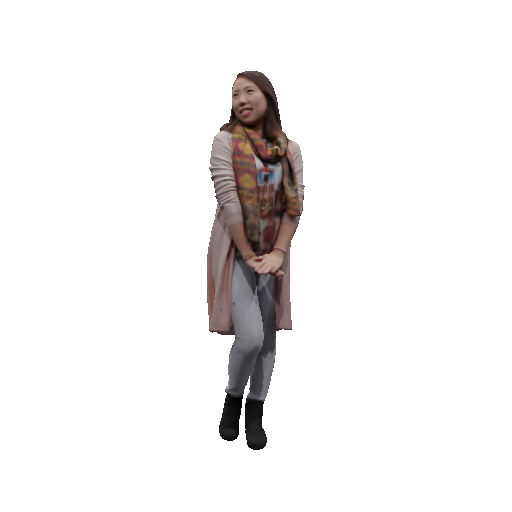

In [7]:
cond